
Ranking de jugadores por porcentaje de cumplimiento:
Damian Lillard: 83.33% (20/24)
Promedio de puntos: 25.17
Desviación estándar de puntos: 8.96

Tabla completa de Damian Lillard:

          Date  Opp  PTS     MP
0   2024-10-23  PHI   30  38:18
1   2024-10-25  CHI   28  35:47
2   2024-10-27  BRK   21  32:04
3   2024-10-28  BOS   33  35:32
4   2024-10-31  MEM    4  33:21
5   2024-11-02  CLE   41  38:34
6   2024-11-04  CLE   36  37:20
7   2024-11-07  UTA   34  37:02
8   2024-11-08  NYK   19  34:26
9   2024-11-10  BOS   14  35:47
13  2024-11-18  HOU   18  35:38
14  2024-11-20  CHI   20  35:37
15  2024-11-22  IND   24  36:49
16  2024-11-23  CHO   31  34:42
17  2024-11-26  MIA   37  37:54
18  2024-11-30  WAS   25  39:51
19  2024-12-03  DET   27  31:44
21  2024-12-04  ATL   25  34:15
22  2024-12-06  BOS   31  40:27
23  2024-12-08  BRK   15  38:49
24  2024-12-10  ORL   28  38:44
25  2024-12-14  ATL   25  37:09
30  2024-12-28  CHI   29  35:28
31  2024-12-31  IND    9  35:57


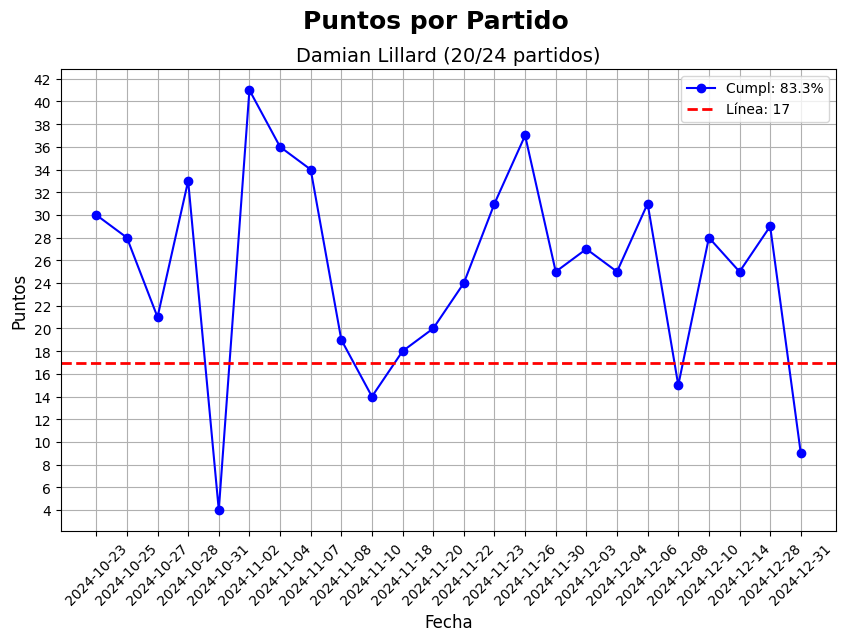

Coby White: 71.88% (23/32)
Promedio de puntos: 17.94
Desviación estándar de puntos: 6.72

Tabla completa de Coby White:

          Date  Opp  PTS     MP
0   2024-10-23  NOP   10  34:47
1   2024-10-25  MIL   35  34:22
2   2024-10-26  OKC    9  29:48
3   2024-10-28  MEM   20  32:00
4   2024-10-30  ORL   21  37:22
5   2024-11-01  BRK   21  34:19
6   2024-11-04  UTA   28  34:17
7   2024-11-06  DAL    8  28:33
8   2024-11-07  MIN   24  33:59
9   2024-11-09  ATL   18  32:55
10  2024-11-11  CLE   20  37:18
11  2024-11-13  NYK   22  35:34
12  2024-11-15  CLE   29  29:53
13  2024-11-17  HOU    8  24:56
14  2024-11-18  DET   25  33:15
15  2024-11-20  MIL   14  31:51
16  2024-11-22  ATL   20  37:21
17  2024-11-23  MEM   11  29:54
18  2024-11-26  WAS   21  31:06
19  2024-11-27  ORL    9  25:59
21  2024-11-29  BOS   11  32:35
24  2024-12-06  IND   19  31:57
25  2024-12-08  PHI   13  36:52
26  2024-12-13  CHO   18  32:29
27  2024-12-16  TOR   19  34:38
28  2024-12-19  BOS   12  32:18
29  2024-12-21 

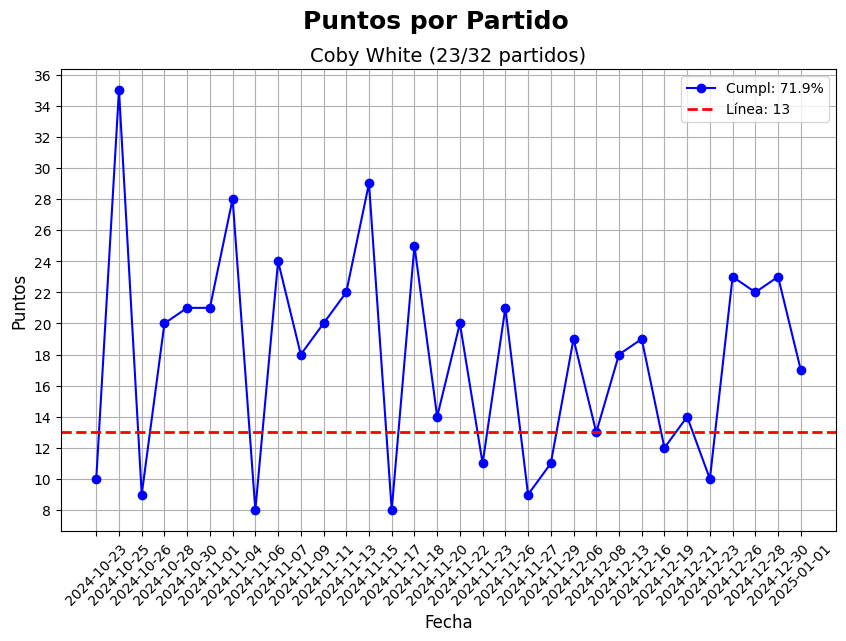

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


# Jugador y su URL
jugadores_urls = {
     "Damian Lillard": {
        "url": "https://www.basketball-reference.com/players/l/lillada01/gamelog/2025",
        "linea_apuesta": 17,
    },
     "Coby White": {
        "url": "https://www.basketball-reference.com/players/w/whiteco01/gamelog/2025",
        "linea_apuesta": 13,
    },
}

# Función para procesar datos de un jugador
def procesar_datos_jugador(jugador, url, linea_apuesta):
    try:
        tables = pd.read_html(url, header=0)
        if len(tables) <= 7:
            raise ValueError("No se encontró la tabla esperada")

        df = tables[7]
        required_columns = ["Date", "Opp", "PTS", "MP"]
        if not all(col in df.columns for col in required_columns):
            raise ValueError("La tabla no contiene las columnas necesarias")

        df_filtered = df[required_columns].copy()
        df_filtered["PTS"] = pd.to_numeric(df_filtered["PTS"], errors="coerce")
        df_filtered = df_filtered.dropna(subset=["PTS"])
        df_filtered["PTS"] = df_filtered["PTS"].astype(int)
        df_filtered = df_filtered.sort_values("Date")

        promedio = df_filtered["PTS"].mean()
        desviacion_estandar = df_filtered["PTS"].std()
        total_partidos = len(df_filtered)
        cumplidos = sum(df_filtered["PTS"] >= linea_apuesta)
        porcentaje_cumplidos = (cumplidos / total_partidos) * 100 if total_partidos > 0 else 0

        return df_filtered, promedio, desviacion_estandar, total_partidos, cumplidos, porcentaje_cumplidos
    except Exception as e:
        print(f"Error al procesar los datos de {jugador}: {e}")
        return None, None, None, None, None, None

# Función para graficar los datos de un jugador
def graficar_datos_jugador(jugador, df, promedio, linea_apuesta, total_partidos, cumplidos, porcentaje_cumplidos):
    if df is None or "Date" not in df.columns:
        print(f"No se puede graficar para {jugador}: datos inválidos")
        return

    plt.figure(figsize=(10, 6))
    plt.plot(df["Date"], df["PTS"], marker="o", label=f"Cumpl: {porcentaje_cumplidos:.1f}%", color="blue")
    plt.axhline(linea_apuesta, color="red", linestyle="--", linewidth=2, label=f"Línea: {linea_apuesta}")

    # Títulos y personalización
    plt.suptitle("Puntos por Partido", fontsize=18, weight="bold")
    plt.title(f"{jugador} ({cumplidos}/{total_partidos} partidos)", fontsize=14)
    plt.xlabel("Fecha", fontsize=12)
    plt.ylabel("Puntos", fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(range(int(df["PTS"].min()), int(df["PTS"].max()) + 2, 2))
    plt.legend(loc="upper right")  # Leyenda en la esquina superior derecha
    plt.grid(True)
    plt.show()

# Diccionario para almacenar estadísticas finales
estadisticas_finales = []

# Procesar y graficar datos para todos los jugadores
for jugador, info in jugadores_urls.items():
    df, promedio, desviacion_estandar, total_partidos, cumplidos, porcentaje_cumplidos = procesar_datos_jugador(jugador, info["url"], info["linea_apuesta"])
    if df is not None:
        estadisticas_finales.append({
            "Jugador": jugador,
            "Promedio": promedio,
            "Desviación Estándar": desviacion_estandar,
            "Total Partidos": total_partidos,
            "Cumplidos": cumplidos,
            "Porcentaje Cumplidos": porcentaje_cumplidos,
            "Tabla": df,  # Incluye la tabla completa en el diccionario
        })

# Ordenar los jugadores por porcentaje cumplido (de mayor a menor)
estadisticas_finales.sort(key=lambda x: x["Porcentaje Cumplidos"], reverse=True)

# Imprimir el ranking final y las tablas completas
print("\nRanking de jugadores por porcentaje de cumplimiento:")
for stats in estadisticas_finales:
    print(f"{stats['Jugador']}: {stats['Porcentaje Cumplidos']:.2f}% ({stats['Cumplidos']}/{stats['Total Partidos']})")
    print(f"Promedio de puntos: {stats['Promedio']:.2f}")
    print(f"Desviación estándar de puntos: {stats['Desviación Estándar']:.2f}")
    print(f"\nTabla completa de {stats['Jugador']}:\n")
    print(stats["Tabla"])  # Imprime la tabla completa
    graficar_datos_jugador(
        stats["Jugador"],
        stats["Tabla"],
        stats["Promedio"],
        jugadores_urls[stats["Jugador"]]["linea_apuesta"],
        stats["Total Partidos"],
        stats["Cumplidos"],
        stats["Porcentaje Cumplidos"],
    )
